In [51]:
# Team Bean Burrito
'''
Gabrielle Guidote 40175182
Marie-Jose Castellanos 40168044
Amrit Sohpal 40176197
'''
# Assignment 1
# Penguin Dataset
output_file = "penguin-performance.txt" 

In [52]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#Test Balance trees
# from imblearn.over_sampling import SMOTE

#5 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#4 a : DT
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#4 b : DT GridSearch
from sklearn.model_selection import GridSearchCV

#4 c: MLP
from sklearn.neural_network import MLPClassifier

# performance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [53]:
def write_performance_to_file(filename, model_description, confusion_mtrx, classification, accuracy, macro_avg_f1, weight_avg_f1,
                              param=None, bestParam=None, running_six = False):
    # 'a' opens a file, if file doesn't exist, create a new file. 
    if param is None:
        param = {}
    if bestParam is None:
        bestParam = {}
    with open(filename, 'a') as file:
        
        # Separates step 6 from the rest of the file. 
        if running_six:
            file.write("\n\n\n\n")
            file.write("*-*-*-*-*-*-*-*-*-*-*-* RUNNING STEP 6 *-*-*-*-*-*-*-*-*-*-*-*\n")
    
        # Separator and Model Description
        file.write("**************************************************\n")
        file.write(f"(A) Model: {model_description}\n\n")
        if len(param) != 0:
            param_str = '\n'.join(f'{key}: {value}' for key, value in param.items())
            file.write(f"Parameters:\n")
            file.write(f"{param_str}\n\n")
        
        if len(bestParam) != 0:
            param_str = '\n'.join(f'{key}: {value}' for key, value in bestParam.items())
            file.write(f"Best Parameters:\n")
            file.write(f"{param_str}\n\n")
            
        file.write("--------------------------------------------------\n\n")
        # Confusion Matrix
        file.write("(B) Confusion Matrix:\n")
        file.write(f"{confusion_mtrx}\n\n")
        
        file.write("--------------------------------------------------\n\n")

        # Classification Report (Precision, Recall, F1-measure for each class)
        file.write("(C) Classification Report:\n")
        file.write(f"{classification}\n\n")
        file.write("--------------------------------------------------\n\n")

        # Accuracy, Macro-average F1 and Weighted-average F1
        file.write("(D) Accuracy: {:.2f}\n".format(accuracy))
        file.write("Macro-average F1: {:.2f}\n".format(macro_avg_f1))
        file.write("Weighted-average F1: {:.2f}\n\n".format(weight_avg_f1))
        file.write("--------------------------------------------------\n\n")

    

DATASET 1 :  PENGUINS

In [54]:
# data regarding penguins such as their island, sex and a variety of physical features and we need to predict their species (Adelie, Gentoo, Chinstap)
df = pd.read_csv("penguins.csv")
df.info()
df.head()
print(df["island"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB
['Torgersen' 'Biscoe' 'Dream']


Methods for transforming string to numerical values

In [55]:
# Island and sex features are strings

# i. convert these features into 1-hot vectors (also known as dummy-coded data)
df = pd.get_dummies(df,columns=['sex','island'])
df.head()
# ii. convert these features into categories yourself

# Replace Sex
# df['sex'].replace(['MALE', 'FEMALE'], [0, 1], inplace=True)
# print(df["sex"].unique())

# # Replace Island
# df['island'].replace(['Torgersen', 'Biscoe', 'Dream'], [0,1, 2], inplace=True)
# print(df["island"].unique())

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181,3750,False,True,False,False,True
1,Adelie,39.5,17.4,186,3800,True,False,False,False,True
2,Adelie,40.3,18.0,195,3250,True,False,False,False,True
3,Adelie,36.7,19.3,193,3450,True,False,False,False,True
4,Adelie,39.3,20.6,190,3650,False,True,False,False,True


2. Plot the percentage of the instances in each output class and store the graphic in a file called penguin-classes.gif
/ abalone-classes.gif. This analysis of the dataset will allow you to determine if the classes are balanced.
Which metric is more appropriate to use to evaluate the performance. Be ready to discuss this at the demo.

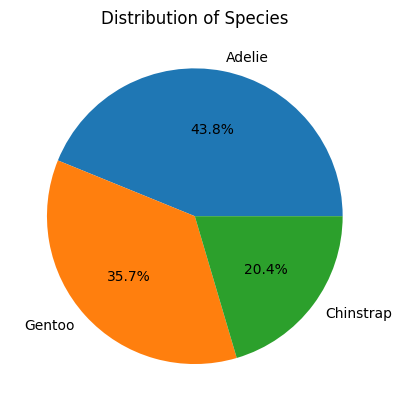

In [56]:
class_count = df['species'].value_counts()
plt.pie(class_count, labels=class_count.index, autopct='%1.1f%%')
plt.title('Distribution of Species')
# plt.show()
# save image 
plt.savefig('penguin-classes.png') 

3. Split the dataset
 using train test split using the default parameter values

In [57]:

X =  df.loc[:, df.columns != 'species']
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify=y)

In [58]:
# Creating an oversampler
# smote = SMOTE()

# # Applying SMOTE to your training data
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

4. Train and test 4 different classifiers:

# Base DT
(a) Base-DT: a Decision Tree with the default parameters. Show the decision tree graphically (for the
abalone dataset, you can restrict the tree depth for visualisation purposes)

In [59]:
# Training base DT
base_DT_D1 = DecisionTreeClassifier()
base_DT_D1.fit(X_train, y_train)

DecisionTreeClassifier()

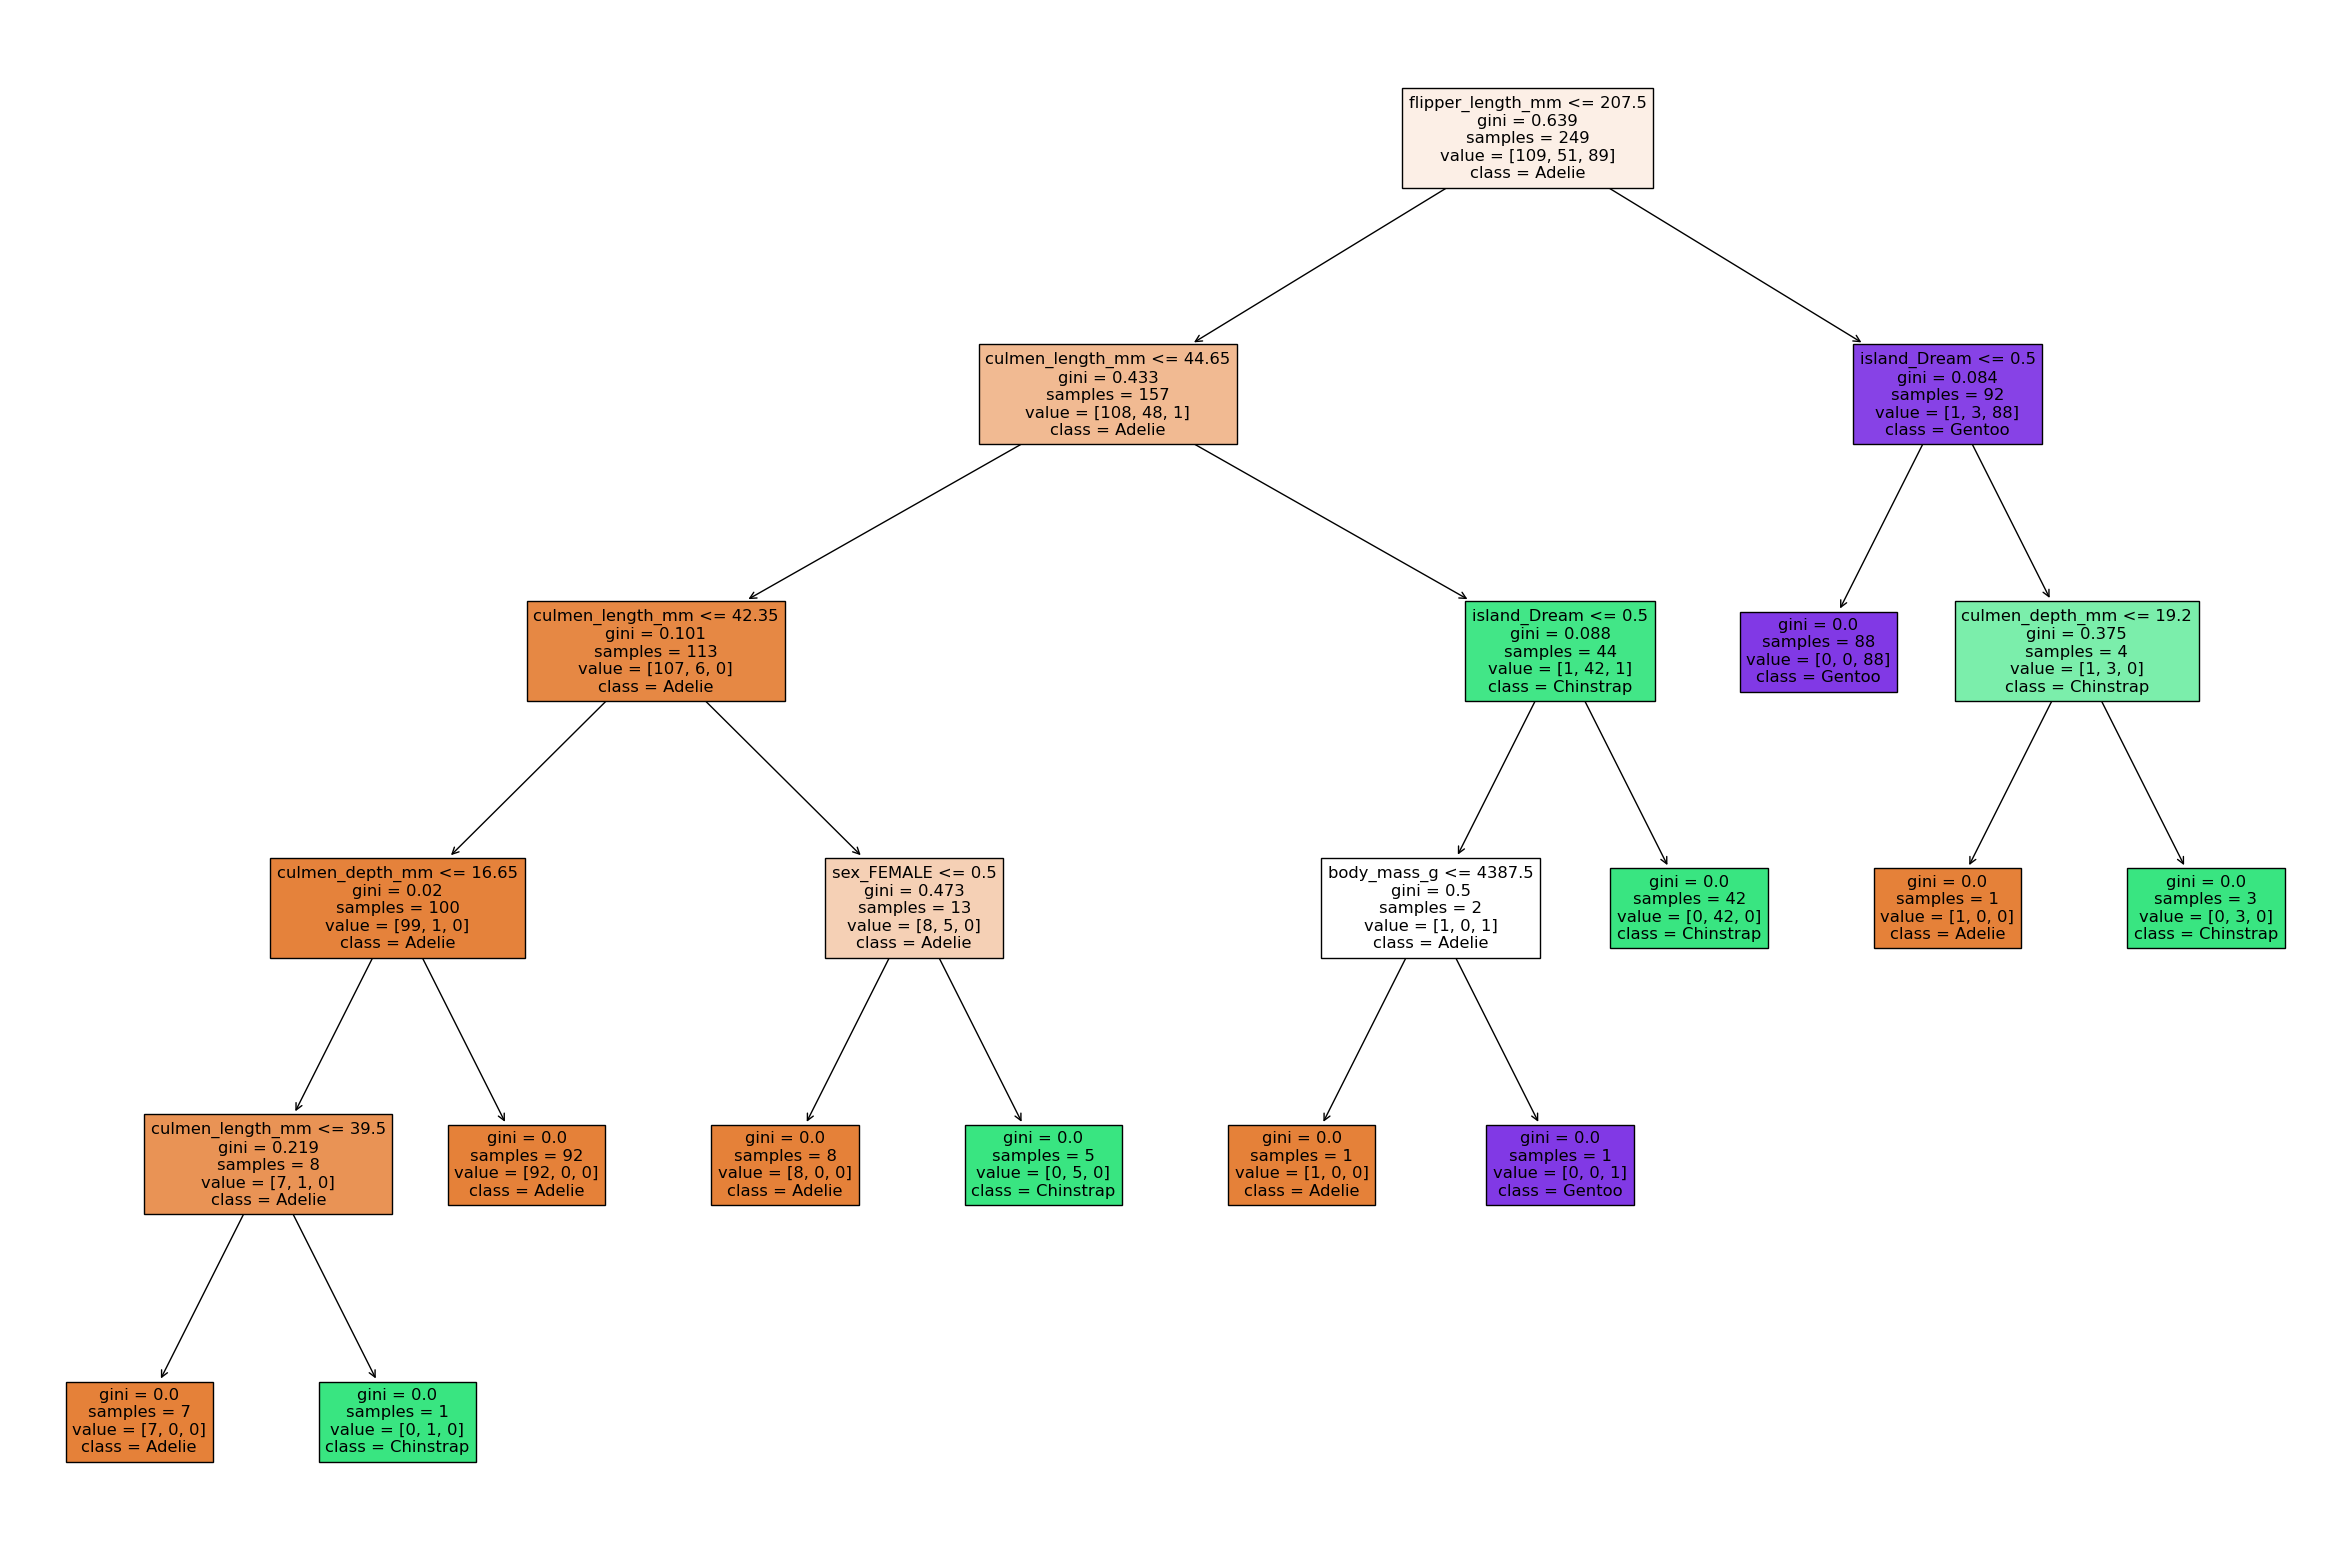

In [60]:
# Tree Visualization
plt.figure(figsize=(30 , 20))  # Set the figure size (width, height) in inches
plot_tree(base_DT_D1, filled=True, feature_names=X.columns, class_names=np.unique(y_train))
plt.show()

In [61]:
# Testing base DT
predictions = base_DT_D1.predict(X_test)

In [62]:
# Performance
print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[35  0  2]
 [ 1 16  0]
 [ 0  0 30]]
              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        37
   Chinstrap       1.00      0.94      0.97        17
      Gentoo       0.94      1.00      0.97        30

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.97        84
weighted avg       0.97      0.96      0.96        84



In [63]:
# Output file
f1_scr_weighted = f1_score(y_test,predictions, average="weighted")
f1_scr_macro = f1_score(y_test,predictions, average="macro")
accuracy = accuracy_score(y_test, predictions)
write_performance_to_file(output_file, "(A) Base-DT", confusion_matrix(y_test, predictions), classification_report(y_test, predictions), accuracy, f1_scr_macro, f1_scr_weighted)

# (A) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model 
    # (e.g. the model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
    # display the best hyperparameters found by the gridsearch.
# (B) the confusion matrix
# (C) the precision, recall, and F1-measure for each class
# (D) the accuracy, macro-average F1 and weighted-average F1 of the model

# TOP DT
(b) Top-DT: a better performing Decision Tree found using a gridsearch. The gridsearch will allow you
to find the best combination of hyper-parameters, as determined by the evaluation function that you
have determined in step (3) above. The hyper-parameters that you will experiment with are:
• criterion: gini or entropy
• max depth : 2 different values of your choice and ”None”
• min samples split: 3 different values of your choice
Show the decision tree graphically (for the abalone dataset, you can restrict the tree depth for visualisation purposes)

In [64]:
# Training top DT
parameters = {'criterion':['gini','entropy'], 'max_depth':[3,5,None], 'min_samples_split':[2,5,10]}

top_DT_D1 = DecisionTreeClassifier()
top_DT_D1 = GridSearchCV(top_DT_D1, parameters)

top_DT_D1.fit(X_train, y_train)

print(top_DT_D1.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}


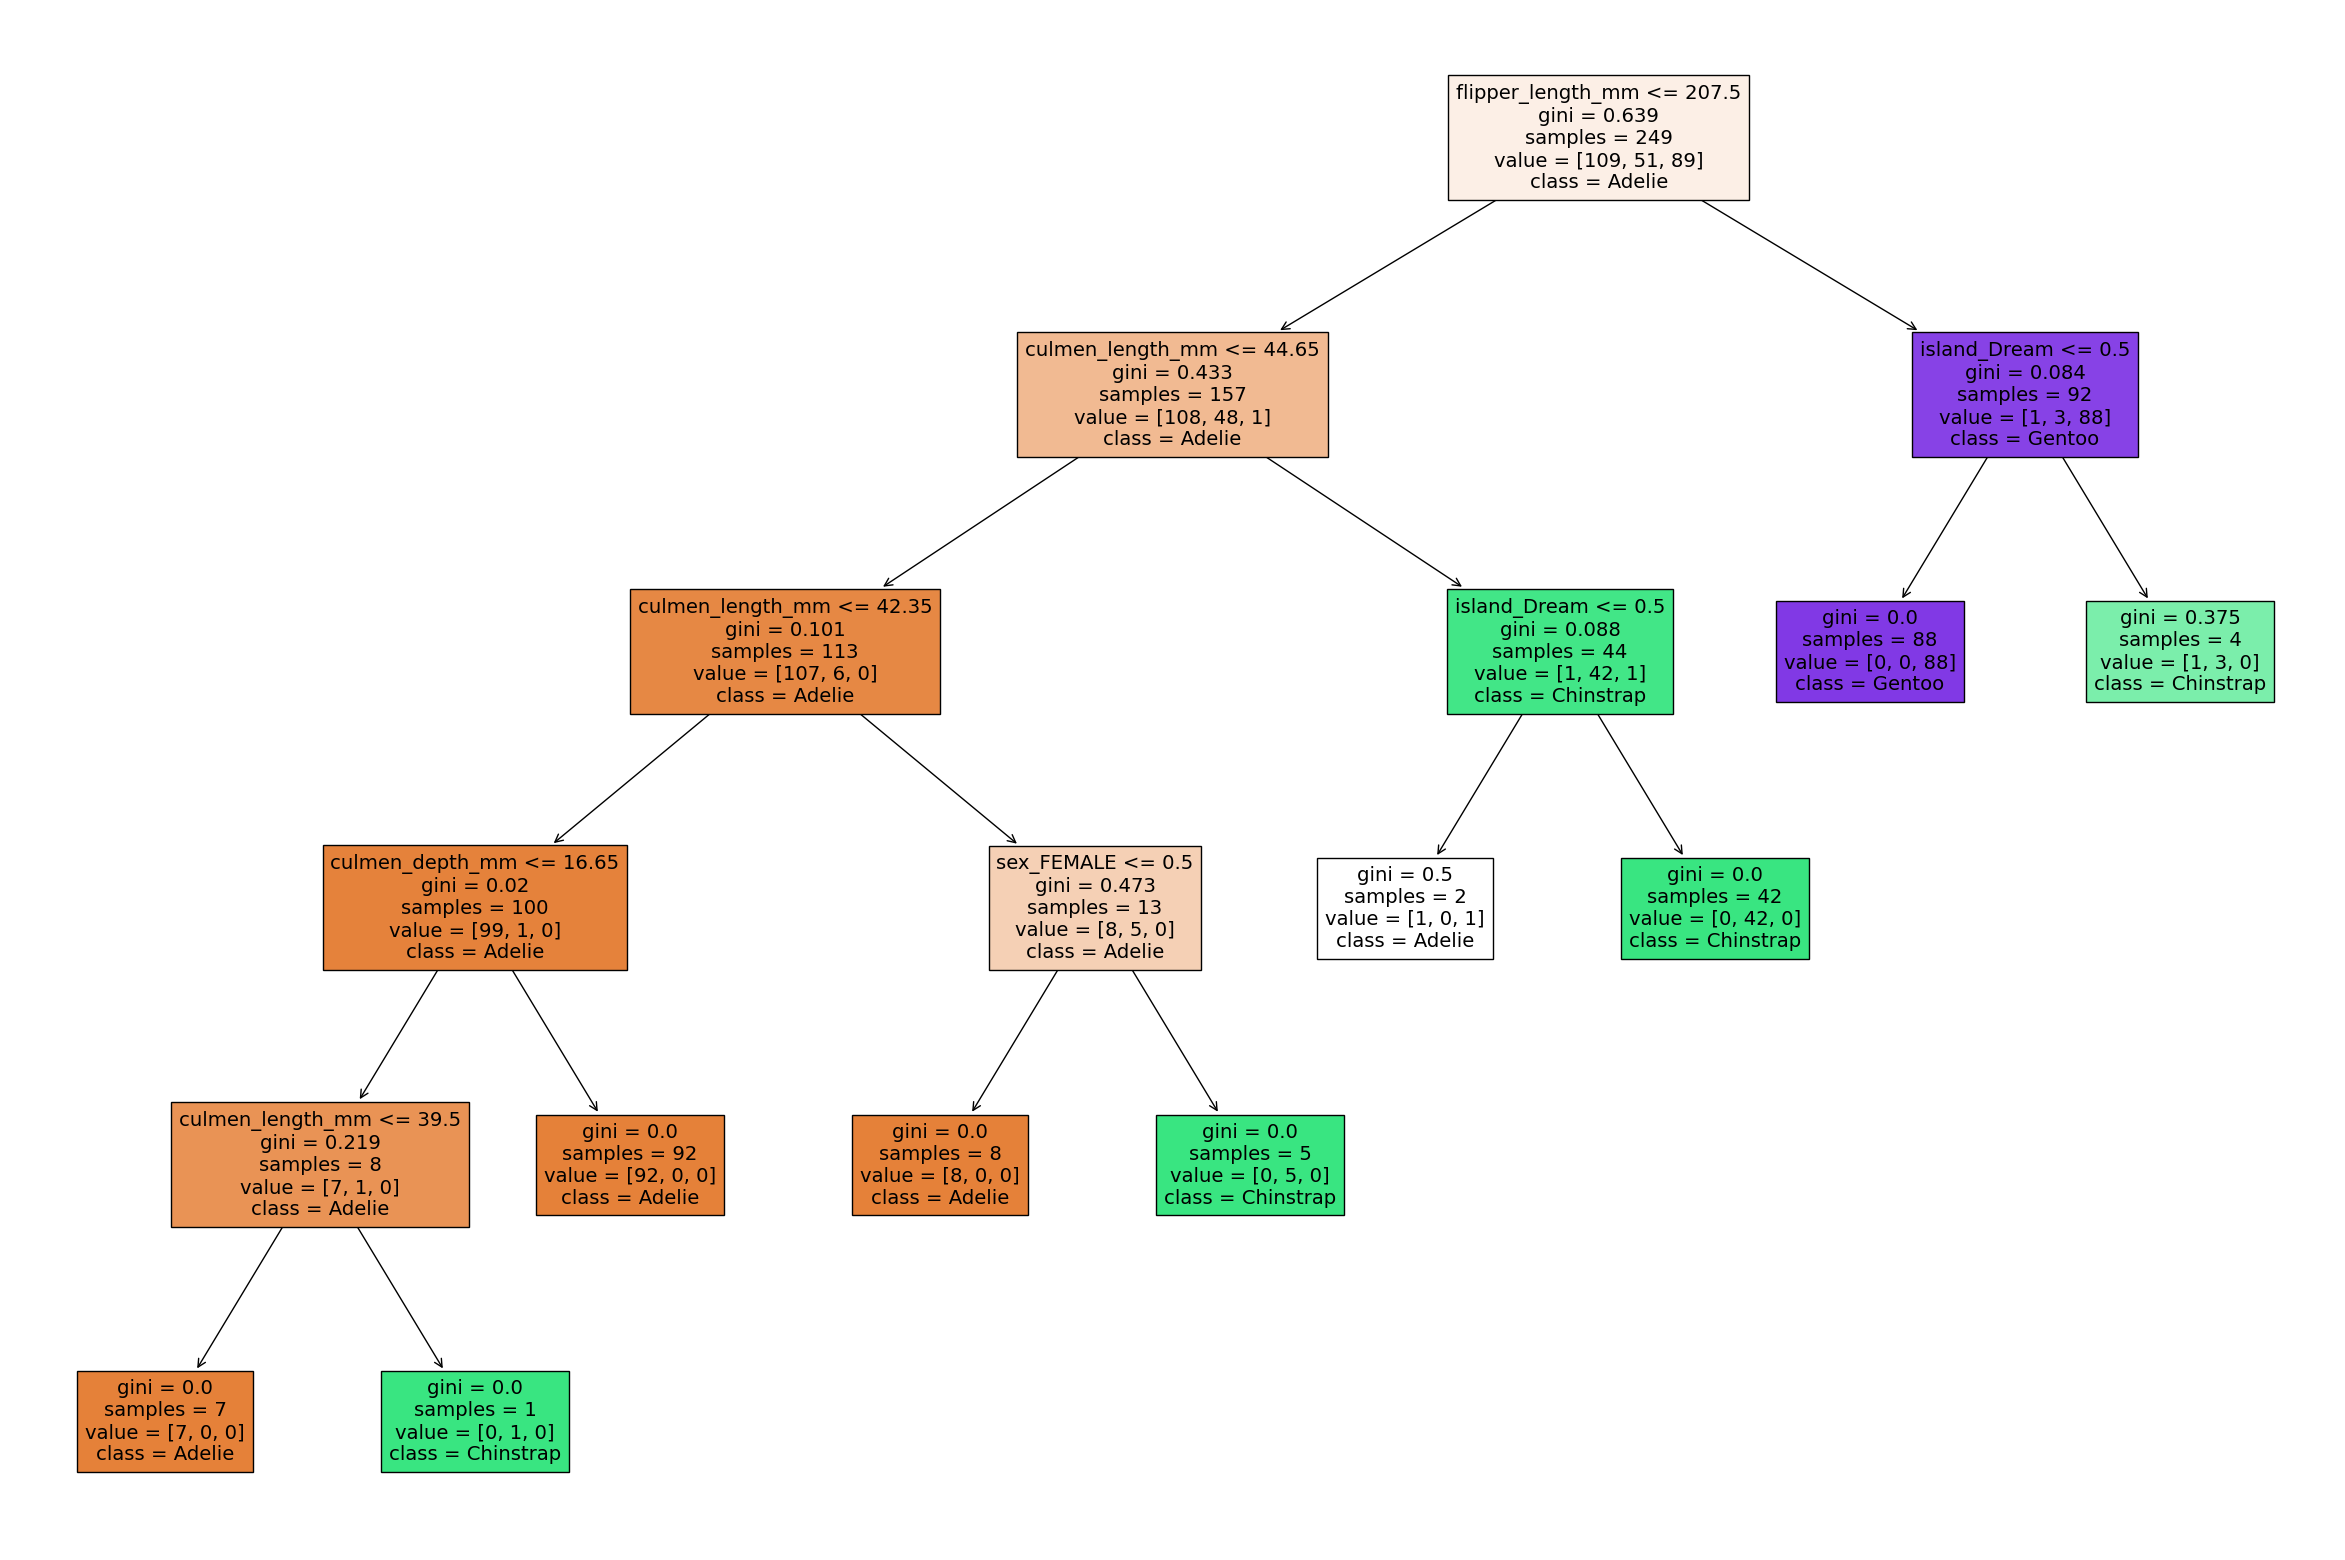

In [65]:
# Visualize Tree
plt.figure(figsize=(30 , 20))  # Set the figure size (width, height) in inches
plot_tree(top_DT_D1.best_estimator_, filled=True, feature_names=X.columns, class_names=np.unique(y_train))
plt.show()

In [66]:
# Testing base DT
predictions = top_DT_D1.predict(X_test)

In [67]:
# Performance
print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[36  0  1]
 [ 0 17  0]
 [ 1  0 29]]
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       0.97      0.97      0.97        30

    accuracy                           0.98        84
   macro avg       0.98      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84



In [68]:
# Output file
f1_scr_weighted = f1_score(y_test,predictions, average="weighted")
f1_scr_macro = f1_score(y_test,predictions, average="macro")
accuracy = accuracy_score(y_test, predictions)
write_performance_to_file(output_file, "(B) TOP-DT", confusion_matrix(y_test, predictions), classification_report(y_test, predictions), accuracy, f1_scr_macro, f1_scr_weighted,parameters,top_DT_D1.best_params_)

# BASE MLP
(c) Base-MLP: a Multi-Layered Perceptron with 2 hidden layers of 100+100 neurons, sigmoid/logistic
as activation function, stochastic gradient descent, and default values for the rest of the parameters

In [69]:
# Training base MLP
base_MLP_d1 = MLPClassifier(hidden_layer_sizes=(100,100), activation='logistic', solver='sgd')
base_MLP_d1.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              solver='sgd')

In [70]:
# Testing base MLP
predictions = base_MLP_d1.predict(X_test)

In [71]:
# Performance
print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[37  0  0]
 [17  0  0]
 [30  0  0]]
              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61        37
   Chinstrap       0.00      0.00      0.00        17
      Gentoo       0.00      0.00      0.00        30

    accuracy                           0.44        84
   macro avg       0.15      0.33      0.20        84
weighted avg       0.19      0.44      0.27        84



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# Output file
f1_scr_weighted = f1_score(y_test,predictions, average="weighted")
f1_scr_macro = f1_score(y_test,predictions, average="macro")
accuracy = accuracy_score(y_test, predictions)
write_performance_to_file(output_file, "(C) Base-MLP", confusion_matrix(y_test, predictions), classification_report(y_test, predictions), accuracy, f1_scr_macro, f1_scr_weighted)

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# TOP MLP

(d) Top-MLP: a better performing Multi-Layered Perceptron found using grid search. For this, you need
to experiment with the following hyper-parameter values:
• activation function: sigmoid, tanh and relu
• 2 network architectures of your choice: for eg 2 hidden layers with 30 + 50 nodes, 3 hidden layers
with 10 + 10 + 10
• solver: adam and stochastic gradient descent

In [73]:
# Training top MLP
parameters = {
    'activation': ['logistic', 'tanh', 'relu'],  # 'logistic' is equivalent to 'sigmoid'
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd']
}

mlp = MLPClassifier()
top_MLP_d1 = GridSearchCV(mlp, parameters)  
top_MLP_d1.fit(X_train, y_train)

best_params = top_MLP_d1.best_params_
best_score = top_MLP_d1.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multi

Best Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}
Best Score: 0.5857142857142856


In [74]:
# Testing base MLP
best_mlp = top_MLP_d1.best_estimator_
predictions = best_mlp.predict(X_test)

In [75]:
# Performance
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[37  0  0]
 [17  0  0]
 [30  0  0]]
              precision    recall  f1-score   support

      Adelie       0.44      1.00      0.61        37
   Chinstrap       0.00      0.00      0.00        17
      Gentoo       0.00      0.00      0.00        30

    accuracy                           0.44        84
   macro avg       0.15      0.33      0.20        84
weighted avg       0.19      0.44      0.27        84



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
# Output file
f1_scr_weighted = f1_score(y_test,predictions, average="weighted")
f1_scr_macro = f1_score(y_test,predictions, average="macro")
accuracy = accuracy_score(y_test, predictions)
write_performance_to_file(output_file, "(D) TOP-MLP", confusion_matrix(y_test, predictions), classification_report(y_test, predictions), accuracy, f1_scr_macro, f1_scr_weighted,parameters,top_MLP_d1.best_params_)

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. Redo steps 4 & 5, 5 times for each model and append in the performance files:
(A) the average accuracy & the variance,
(B) average macro-average F1 & the variance,
(C) average weighted-average F1 & the variance.
Does the same model give you the same performance every time? is the standard deviation high? Be ready
to discuss this at the demo.

In [77]:
#Implementing Variables for (A),(B),(C)

#Variables for base DT
base_dt_accuracies = []
base_dt_macro_f1_scores = []
base_dt_weighted_f1_scores = []

#Variables for top DT
top_dt_accuracies = []
top_dt_macro_f1_scores = []
top_dt_weighted_f1_scores = []

#Variables for base MLP
base_mlp_accuracies = []
base_mlp_macro_f1_scores = []
base_mlp_weighted_f1_scores = []

#Variables for top MLP
top_mlp_accuracies = []
top_mlp_macro_f1_scores = []
top_mlp_weighted_f1_scores = []

step_six = True
# Running Step 6
for i in range(5):
    # --------------------------------Code for BASE DT--------------------------------

    # Training base DT
    base_DT_D1 = DecisionTreeClassifier()
    base_DT_D1.fit(X_train, y_train)
    
    # Testing base DT
    predictions = base_DT_D1.predict(X_test)
    
    # Output file
    f1_scr_weighted = f1_score(y_test,predictions, average="weighted")
    f1_scr_macro = f1_score(y_test,predictions, average="macro")
    accuracy = accuracy_score(y_test, predictions)
    write_performance_to_file(output_file, "(A) Base-DT", confusion_matrix(y_test, predictions), classification_report(y_test, predictions), accuracy, f1_scr_macro, f1_scr_weighted,{},{},step_six)
    step_six = False
    
    base_dt_accuracies.append(accuracy)
    base_dt_macro_f1_scores.append(f1_scr_macro)
    base_dt_weighted_f1_scores.append(f1_scr_weighted)
    # --------------------------------Code for TOP DT--------------------------------
    
    # Training top DT
    parameters = {'criterion':['gini','entropy'], 'max_depth':[3,5,None], 'min_samples_split':[2,5,10]}
    
    top_DT_D1 = DecisionTreeClassifier()
    top_DT_D1 = GridSearchCV(top_DT_D1, parameters)
    
    top_DT_D1.fit(X_train, y_train)
    
    # Testing base DT
    predictions = top_DT_D1.predict(X_test)
    
    # Output file
    f1_scr_weighted = f1_score(y_test,predictions, average="weighted")
    f1_scr_macro = f1_score(y_test,predictions, average="macro")
    accuracy = accuracy_score(y_test, predictions)
    write_performance_to_file(output_file, "(B) TOP-DT", confusion_matrix(y_test, predictions), classification_report(y_test, predictions), accuracy, f1_scr_macro, f1_scr_weighted,parameters,top_DT_D1.best_params_)
    
    # append current value to our lists 
    top_dt_accuracies.append(accuracy)
    top_dt_macro_f1_scores.append(f1_scr_macro)
    top_dt_weighted_f1_scores.append(f1_scr_weighted)
    
    # --------------------------------Code for BASE MLP--------------------------------
    
    # Training base MLP
    base_MLP_d1 = MLPClassifier(hidden_layer_sizes=(100,100), activation='logistic', solver='sgd')
    base_MLP_d1.fit(X_train, y_train)
    
    # Testing base MLP
    predictions = base_MLP_d1.predict(X_test)
    
    # Output file
    f1_scr_weighted = f1_score(y_test,predictions, average="weighted")
    f1_scr_macro = f1_score(y_test,predictions, average="macro")
    accuracy = accuracy_score(y_test, predictions)
    write_performance_to_file(output_file, "(C) Base-MLP", confusion_matrix(y_test, predictions), classification_report(y_test, predictions), accuracy, f1_scr_macro, f1_scr_weighted)
    
    # append current value to our lists 
    base_mlp_accuracies.append(accuracy)
    base_mlp_macro_f1_scores.append(f1_scr_macro)
    base_mlp_weighted_f1_scores.append(f1_scr_weighted)
    
    # --------------------------------Code for TOP MLP--------------------------------
    # Training top MLP
    parameters = {
        'activation': ['logistic', 'tanh', 'relu'],  # 'logistic' is equivalent to 'sigmoid'
        'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
        'solver': ['adam', 'sgd']
    }
    
    mlp = MLPClassifier()
    top_MLP_d1 = GridSearchCV(mlp, parameters)  
    top_MLP_d1.fit(X_train, y_train)
    
    # Testing base MLP
    best_mlp = top_MLP_d1.best_estimator_
    predictions = best_mlp.predict(X_test)
    
    # Output file
    f1_scr_weighted = f1_score(y_test,predictions, average="weighted")
    f1_scr_macro = f1_score(y_test,predictions, average="macro")
    accuracy = accuracy_score(y_test, predictions)
    write_performance_to_file(output_file, "(D) TOP-MLP", confusion_matrix(y_test, predictions), classification_report(y_test, predictions), accuracy, f1_scr_macro, f1_scr_weighted,parameters,top_MLP_d1.best_params_)
    
    # append current value to our lists 
    top_mlp_accuracies.append(accuracy)
    top_mlp_macro_f1_scores.append(f1_scr_macro)
    top_mlp_weighted_f1_scores.append(f1_scr_weighted)

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/neur

In [78]:
#Saves our file 
output_file

'penguin-performance.txt'

In [79]:
# Calculating average and variance for all models

# -------------------------------- BASE DT--------------------------------

average_base_dt_accuracies = np.mean(base_dt_accuracies)
variance_base_dt_accuracies = np.var(base_dt_accuracies)

average_base_dt_macro_f1_scores = np.mean(base_dt_macro_f1_scores)
variance_base_dt_macro_f1_scores =np.var(base_dt_macro_f1_scores)

average_base_dt_weighted_f1_scores =np.mean(base_dt_weighted_f1_scores)
variance_base_dt_weighted_f1_scores =np.var(base_dt_weighted_f1_scores)

# -------------------------------- TOP DT--------------------------------

average_top_dt_accuracies = np.mean(top_dt_accuracies)
variance_top_dt_accuracies = np.var(top_dt_accuracies)

average_top_dt_macro_f1_scores = np.mean(top_dt_macro_f1_scores)
variance_top_dt_macro_f1_scores =np.var(top_dt_macro_f1_scores)

average_top_dt_weighted_f1_scores =np.mean(top_dt_weighted_f1_scores)
variance_top_dt_weighted_f1_scores =np.var(top_dt_weighted_f1_scores)

# -------------------------------- BASE MLP--------------------------------

average_base_mlp_accuracies = np.mean(base_mlp_accuracies)
variance_base_mlp_accuracies = np.var(base_mlp_accuracies)

average_base_mlp_macro_f1_scores = np.mean(base_mlp_macro_f1_scores)
variance_base_mlp_macro_f1_scores =np.var(base_mlp_macro_f1_scores)

average_base_mlp_weighted_f1_scores =np.mean(base_mlp_weighted_f1_scores)
variance_base_mlp_weighted_f1_scores =np.var(base_mlp_weighted_f1_scores)

# -------------------------------- TOP MLP--------------------------------
average_top_mlp_accuracies = np.mean(top_mlp_accuracies)
variance_top_mlp_accuracies = np.var(top_mlp_accuracies)

average_top_mlp_macro_f1_scores = np.mean(top_mlp_accuracies)
variance_top_mlp_macro_f1_scores =np.var(top_mlp_accuracies)

average_top_mlp_weighted_f1_scores =np.mean(top_mlp_accuracies)
variance_top_mlp_weighted_f1_scores =np.var(top_mlp_accuracies)

In [80]:
# Open existing file, append all


with open(output_file, 'a') as file:
    file.write("--------------------------------------------------\n")
    file.write(f"The 5 runs for Base DT resulted in\n")
    file.write(f"accuracy: {[round(acc,2) for acc in base_dt_accuracies]}\nf1_macro: {[round(acc,2) for acc in  base_dt_macro_f1_scores]}\nf1_weighted {[round(acc,2) for acc in base_dt_weighted_f1_scores]}\n\n")
    
    file.write("Average Accuracy (Base DT): {:.2f}, Variance: {:.2e}\n".format(average_base_dt_accuracies,variance_base_dt_accuracies))
    file.write("Average Macro F1 (Base DT): {:.2f}, Variance: {:.2e}\n".format(average_base_dt_macro_f1_scores, variance_base_dt_macro_f1_scores))
    file.write("Average Weighted F1 (Base DT): {:.2f}, Variance: {:.2e}\n\n".format(average_base_dt_weighted_f1_scores, variance_base_dt_weighted_f1_scores))
   
    file.write("--------------------------------------------------\n")
    file.write(f"The 5 runs for Top DT resulted in\n")
    file.write(f"accuracy: {[round(acc,2) for acc in top_dt_accuracies]}\nf1_macro: {[round(acc,2) for acc in top_dt_macro_f1_scores]}\nf1_weighted {[round(acc,2) for acc in top_dt_weighted_f1_scores]}\n\n")
    
    file.write("Average Accuracy (Top DT): {:.2f}, Variance: {:.2e}\n".format(average_top_dt_accuracies,variance_top_dt_accuracies))
    file.write("Average Macro F1 (Top DT): {:.2f}, Variance: {:.2e}\n".format(average_top_dt_macro_f1_scores, variance_top_dt_macro_f1_scores))
    file.write("Average Weighted F1 (Top DT): {:.2f}, Variance: {:.2e}\n\n".format(average_top_dt_weighted_f1_scores, variance_top_dt_weighted_f1_scores))
   
   
    file.write("--------------------------------------------------\n\n")
    file.write(f"The 5 runs for Base MLP resulted in\n")
    file.write(f"accuracy: {[round(acc,2) for acc in base_mlp_accuracies]}\nf1_macro: {[round(acc,2) for acc in base_mlp_macro_f1_scores]}\nf1_weighted {[round(acc,2) for acc in base_mlp_weighted_f1_scores]}\n\n")
    
    file.write("Average Accuracy (Base MLP): {:.2f}, Variance: {:.2e}\n".format(average_base_mlp_accuracies,variance_base_mlp_accuracies))
    file.write("Average Macro F1 (Base MLP): {:.2f}, Variance: {:.2e}\n".format(average_base_mlp_macro_f1_scores, variance_base_mlp_macro_f1_scores))
    file.write("Average Weighted F1 (Base MLP): {:.2f}, Variance: {:.2e}\n\n".format(average_base_mlp_weighted_f1_scores, variance_base_mlp_weighted_f1_scores))
    
    
    file.write("--------------------------------------------------\n\n")
    file.write(f"The 5 runs for Top MLP resulted in\n")
    file.write(f"accuracy: {[round(acc,2) for acc in top_mlp_accuracies]}\nf1_macro: {[round(acc,2) for acc in top_mlp_macro_f1_scores]}\nf1_weighted {[round(acc,2) for acc in top_mlp_weighted_f1_scores]}\n\n")
    
    file.write("Average Accuracy (Base MLP): {:.2f}, Variance: {:.2e}\n".format(average_top_mlp_accuracies,variance_top_mlp_accuracies))
    file.write("Average Macro F1 (Base MLP): {:.2f}, Variance: {:.2e}\n".format(average_top_mlp_macro_f1_scores, variance_top_mlp_macro_f1_scores))
    file.write("Average Weighted F1 (Base MLP): {:.2f}, Variance: {:.2e}\n\n".format(average_top_mlp_weighted_f1_scores, variance_top_mlp_weighted_f1_scores))
    


In [81]:
#Saves our file 
output_file

'penguin-performance.txt'